In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mdates

In [2]:
infile = 'data/t_data.csv'

df = pd.read_csv(infile, index_col=0, parse_dates=True)

In [6]:
def gen_macd_color(df):
    macd_color = []
    macd_color.clear()
    for i in range (0,len(df["MACDh_12_26_9"])):
        if df["MACDh_12_26_9"][i] >= 0 and df["MACDh_12_26_9"][i-1] < df["MACDh_12_26_9"][i]:
            macd_color.append('#26A69A')
            #print(i,'green')
        elif df["MACDh_12_26_9"][i] >= 0 and df["MACDh_12_26_9"][i-1] > df["MACDh_12_26_9"][i]:
            macd_color.append('#B2DFDB')
            #print(i,'faint green')
        elif df["MACDh_12_26_9"][i] < 0 and df["MACDh_12_26_9"][i-1] > df["MACDh_12_26_9"][i] :
            #print(i,'red')
            macd_color.append('#FF5252')
        elif df["MACDh_12_26_9"][i] < 0 and df["MACDh_12_26_9"][i-1] < df["MACDh_12_26_9"][i] :
            #print(i,'faint red')
            macd_color.append('#FFCDD2')
        else:
            macd_color.append('#000000')
            #print(i,'no')
    return macd_color

In [7]:
macd = df[['MACD_12_26_9']]
histogram = df[['MACDh_12_26_9']]
signal = df[['MACDs_12_26_9']]

In [8]:
macd_color = gen_macd_color(df)

In [16]:
apds = [
    mpf.make_addplot(macd,color='#2962FF', panel=1),
    mpf.make_addplot(signal,color='#FF6D00', panel=1),
    mpf.make_addplot(histogram,type='bar',width=0.7,panel=1, color=macd_color,alpha=1,secondary_y=True),
]

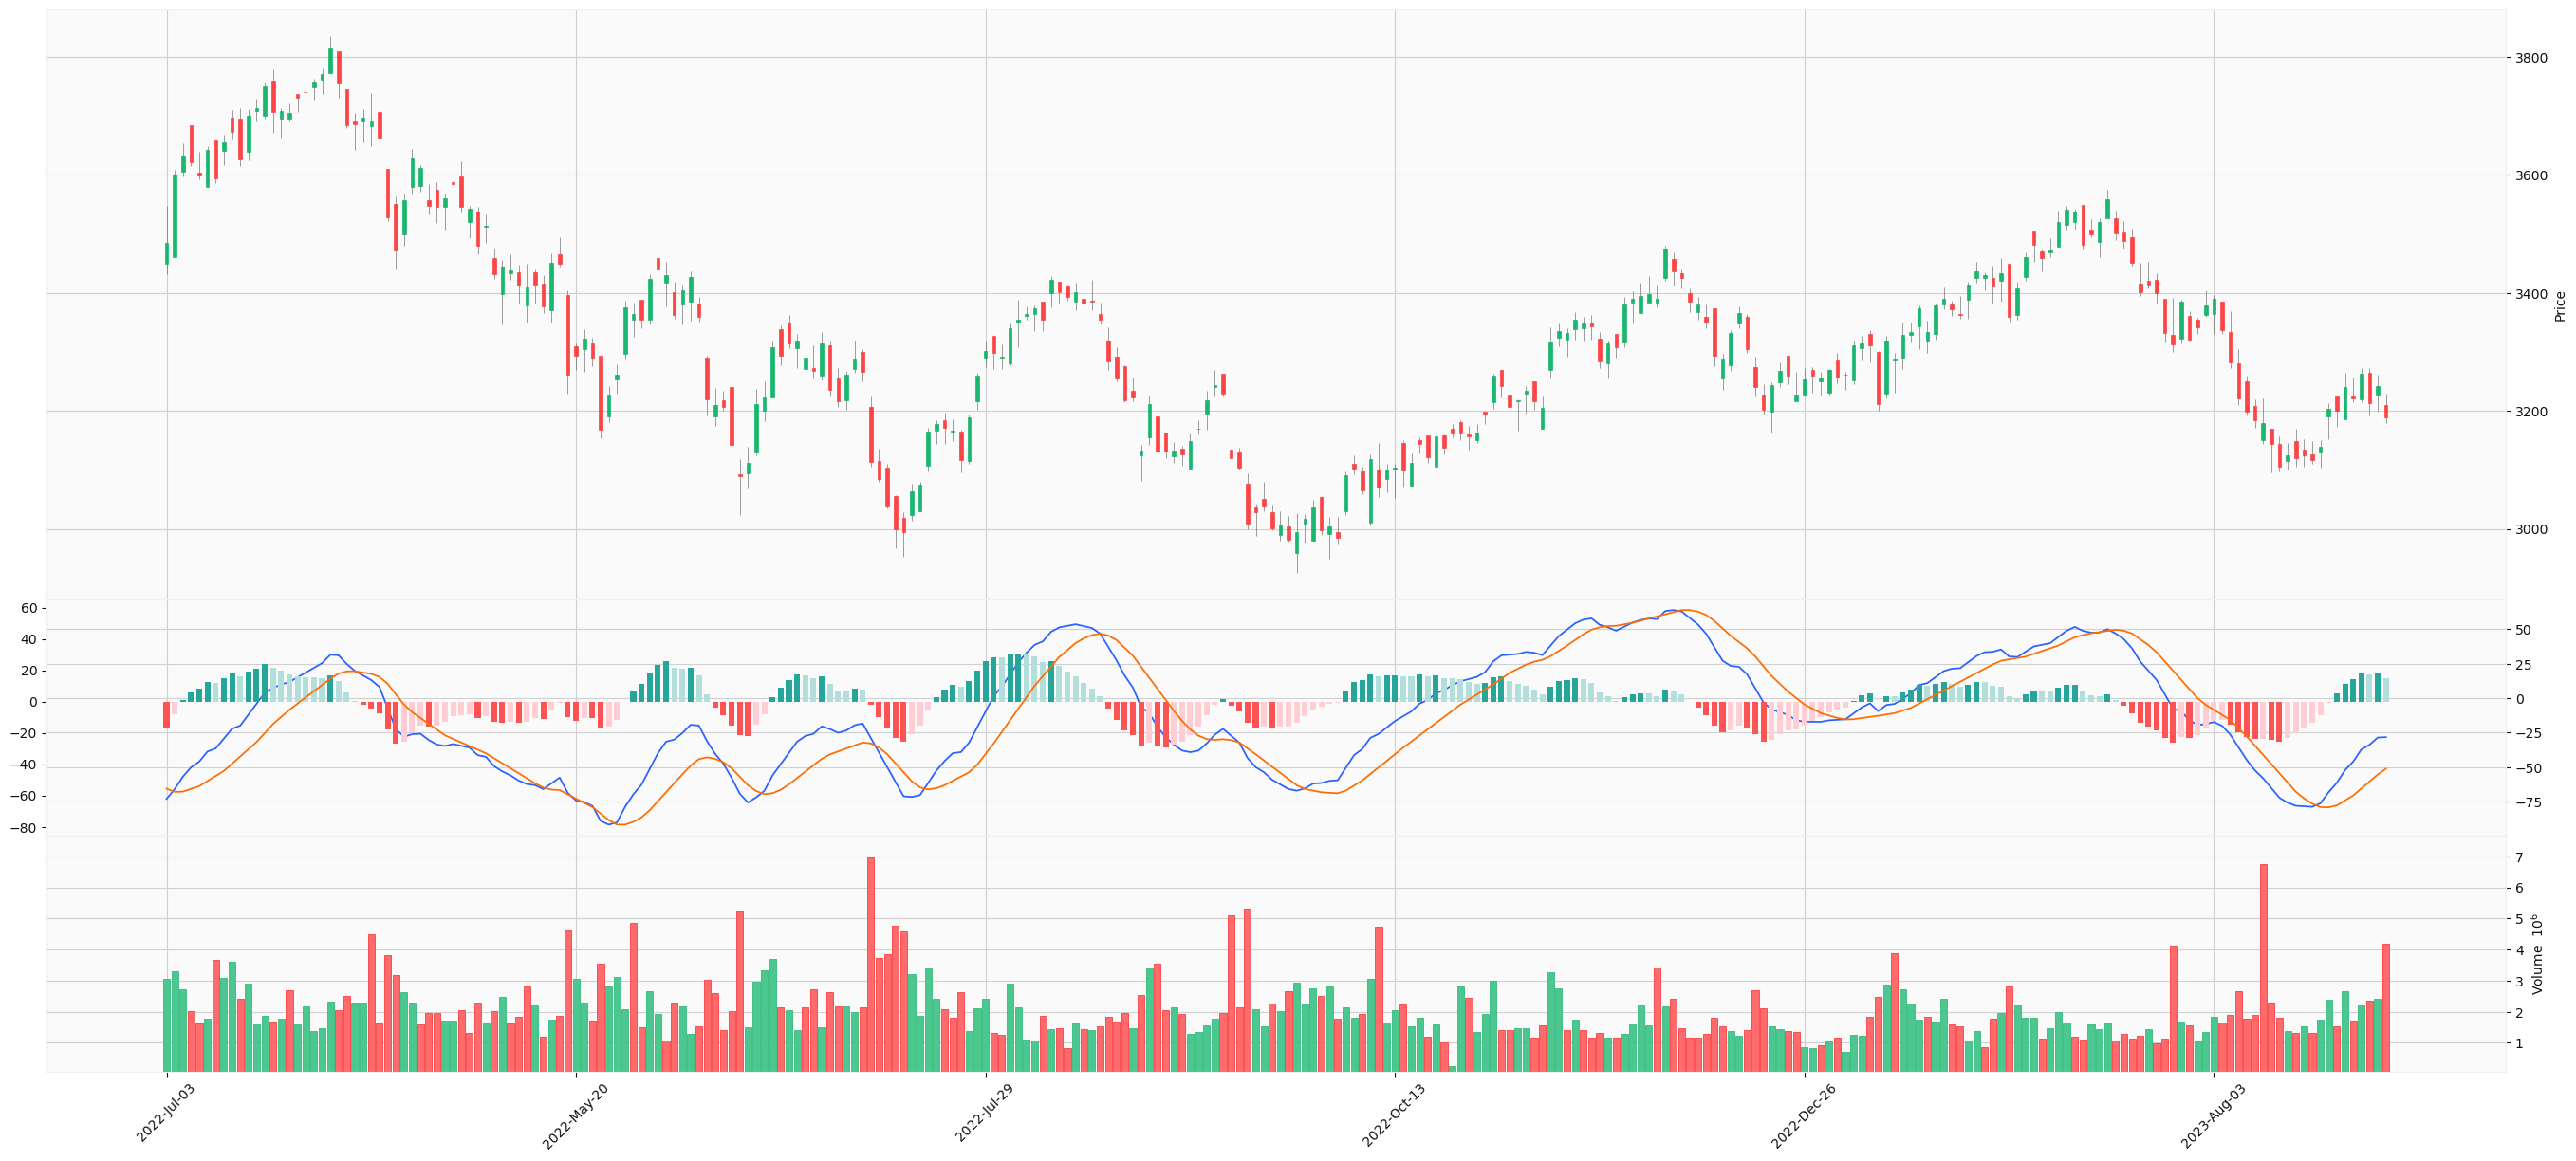

In [20]:
mpf.plot(
    df,
    volume=True,
    type="candle", 
    style="yahoo",
    addplot=apds,
    volume_panel=2,
    figscale=1.2,
    figsize=(36,16,)
    )